<a href="https://colab.research.google.com/github/MikeAnanya19/Web_Scrapper-Summarizer/blob/main/web_scrapper_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
input_url=input("Enter the topic: ")
url="https://en.wikipedia.org/wiki/"+input_url

Enter the topic: F22


In [ ]:
response=requests.get(url)
bs=BeautifulSoup(response.text)
#print(bs.text)

In [ ]:
title_text = bs.title.string
print(title_text)

Lockheed Martin F-22 Raptor - Wikipedia


In [ ]:
first_link = bs.find('a')
#print(first_link)

In [ ]:
all_link = bs.find_all('a')
#print(all_link)

In [ ]:
text=bs.get_text()
#print(text)

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import pipeline
from transformers import AutoTokenizer

In [ ]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [ ]:
#pip install wordcloud

[('f-22', 303), ('``', 282), ("''", 276), ('archived', 200), ('air', 196), ('retrieved', 185), ('force', 147), ('aircraft', 142), ('original', 130), ('fighter', 110), ("'s", 104)]


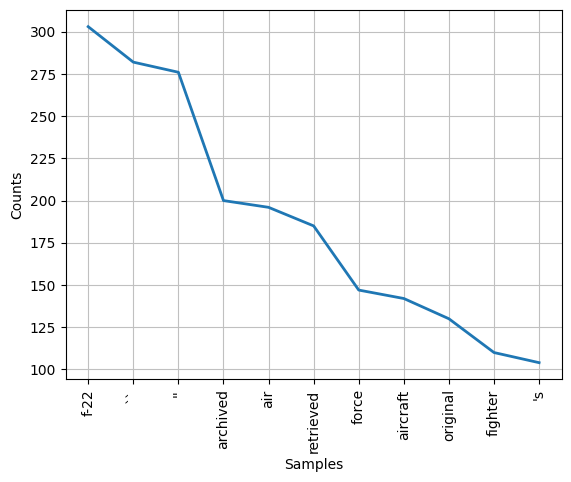

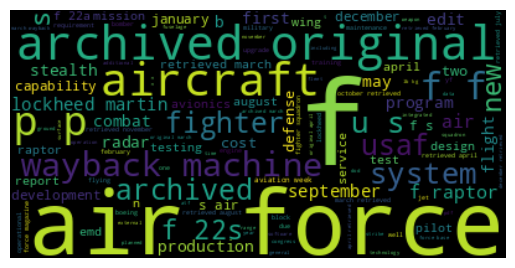


Summary of the text:
Lockheed Martin F-22 Raptor - Wikipedia.    The Raptor is a fighter jet that can fly at speeds of up to Mach 3.


In [ ]:
# Step 1: Tokenization and Stopwords Removal
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_text = [w.lower() for w in word_tokens if w.lower() not in stop_words and w not in string.punctuation]

# Step 2: Stemming or Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stemmed_text = [stemmer.stem(word) for word in filtered_text]
lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]

# Step 3: POS Tagging
pos_tags = pos_tag(lemmatized_text)

# Step 4: Frequency Distribution
fdist = FreqDist(lemmatized_text)
print(fdist.most_common(11))
fdist.plot(11)
plt.show()

# Step 5: Word Cloud Visualization
wordcloud = WordCloud().generate(' '.join(lemmatized_text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Step 6: Summarization using Transformers
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Truncate the text to a shorter length
max_input_length = 1024 ##len(filtered_text)  # Adjust this value based on model limitations
truncated_text = text[:max_input_length]

summary = summarizer(truncated_text, max_length=130, min_length=30, do_sample=False)


# Print the summary
print("\nSummary of the text:")
print(summary[0]['summary_text'])